# Handwritten Digit Recognition using Keras and Tensorflow

# The MNIST dataset

> 
This is probably one of the most popular datasets among machine learning and deep learning enthusiasts. The MNIST dataset contains 60,000 training images of handwritten digits from zero to nine and 10,000 images for testing. So, the MNIST dataset has 10 different classes. The handwritten digits images are represented as a 28×28 matrix where each cell contains grayscale pixel value.

# 1. Import the libraries and load the dataset

First, we are going to import all the modules that we are going to need for training our model. The Keras library already contains some datasets and MNIST is one of them. So we can easily import the dataset and start working with it. The mnist.load_data() method returns us the training data, its labels and also the testing data and its labels.

In [1]:
import keras
import numpy as np

In [2]:
from keras.datasets import mnist

In [3]:
data = mnist.load_data()

In [4]:
(train_images, train_labels), (test_images, test_labels) = data

In [5]:
len(train_images)

60000

In [6]:
len(train_labels)

60000

In [7]:
len(test_images)

10000

#2. Preprocess the data

The image data cannot be fed directly into the model so we need to perform some operations and process the data to make it ready for our neural network. The dimension of the training data is (60000,28,28). The CNN model will require one more dimension so we reshape the matrix to shape (60000,28,28,1).

In [8]:
train_images = train_images.reshape((60000, 28, 28, 1))

In [9]:
test_images =  test_images.reshape((10000, 28, 28, 1))

In [10]:
train_images = train_images.astype('float')/255

In [11]:
test_images = test_images.astype('float')/255

In [12]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

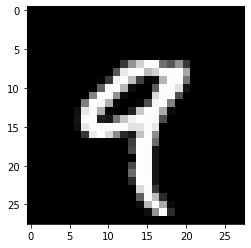

In [13]:
plt.imshow(image.array_to_img(train_images[4]),cmap="gray")

In [14]:
train_labels[4]

9

In [15]:
from tensorflow.keras.utils import to_categorical

train_labels_original = train_labels
train_labels = to_categorical(train_labels)

In [16]:
train_labels[20]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [17]:
test_labels_original =  test_labels
test_labels =  to_categorical(test_labels)

In [18]:
test_labels_original[7]

9

In [19]:
test_labels[7]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

# 3. Create the model

Now we will create our CNN model in Python data science project. A CNN model generally consists of convolutional and pooling layers. It works better for data that are represented as grid structures, this is the reason why CNN works well for image classification problems. The dropout layer is used to deactivate some of the neurons and while training, it reduces offer fitting of the model. We will then compile the model with the Adadelta optimizer.

In [20]:
from keras import layers, models

In [21]:
model = models.Sequential()

In [22]:
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape = (28, 28, 1)))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.add(layers.MaxPooling2D((2,2)))

In [25]:
model.add(layers.Conv2D(64,(3,3), activation='relu'))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.add(layers.MaxPooling2D((2,2)))

In [28]:
model.add(layers.Conv2D(64, (3,3), activation='relu'))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.add(layers.Flatten())

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
____________________________________________________

In [32]:
model.add(layers.Dense(64, activation='relu'))

In [33]:
model.add(layers.Dense(10, activation='softmax'))

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [35]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# 4. Train the model

The model.fit() function of Keras will start the training of the model. It takes the training data, validation data, epochs, and batch size.

In [36]:
model.fit(train_images, train_labels, epochs=100, batch_size=64)

Epoch 1/100
938/938 [==============================] - 19s 4ms/step - loss: 0.3827 - accuracy: 0.8795
Epoch 2/100
938/938 [==============================] - 4s 4ms/step - loss: 0.0483 - accuracy: 0.9848
Epoch 3/100
938/938 [==============================] - 4s 4ms/step - loss: 0.0324 - accuracy: 0.9902
Epoch 4/100
938/938 [==============================] - 4s 4ms/step - loss: 0.0256 - accuracy: 0.9921
Epoch 5/100
938/938 [==============================] - 4s 4ms/step - loss: 0.0178 - accuracy: 0.9944
Epoch 6/100
938/938 [==============================] - 4s 4ms/step - loss: 0.0142 - accuracy: 0.9957
Epoch 7/100
938/938 [==============================] - 4s 4ms/step - loss: 0.0111 - accuracy: 0.9966
Epoch 8/100
938/938 [==============================] - 4s 4ms/step - loss: 0.0089 - accuracy: 0.9970
Epoch 9/100
938/938 [==============================] - 4s 4ms/step - loss: 0.0092 - accuracy: 0.9974
Epoch 10/100
938/938 [==============================] - 4s 4ms/step - loss: 0.0071 - accur

In [37]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.2577 - accuracy: 0.9912


In [38]:
test_accuracy

0.9911999702453613

In [39]:
predictions = model.predict_classes(test_images)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


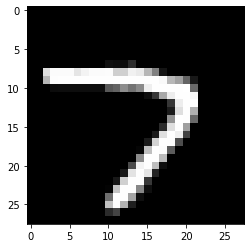

In [40]:
plt.imshow(image.array_to_img(test_images[70]), cmap="gray")

In [41]:
predictions[70]

7

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


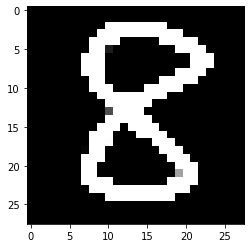

In [42]:
img=image.load_img(path="screen1.png",grayscale=True, target_size=(28,28,1))
img=image.img_to_array(img)

plt.imshow(image.array_to_img(img), cmap="gray")
img=img.astype('float')/255
test_img=img.reshape((1,28,28,1))

img_class=model.predict_classes(test_img)
prediction=img_class[0]

In [43]:
prediction

8